# Đổi mấy đường dẫn là được

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img_height, img_width = (224,224)
batch_size = 24

train_data_dir = "./Dataset/Train" # Đường dẫn đến folder Train
test_data_dir = "./Dataset/Test" # Đường dẫn đến folder Train

In [11]:
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    validation_split=0.4)
train_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

Found 20 images belonging to 20 classes.


In [12]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set
)

Found 20 images belonging to 20 classes.


In [6]:
x,y = test_generator.next()
x.shape

AttributeError: 'DirectoryIterator' object has no attribute 'next'

In [ ]:
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# Create an instance of the Adam optimizer with a specific learning rate (e.g., 0.0002)
custom_optimizer = Adam(learning_rate=0.0002)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=15)


Epoch 1/15
1/1 [==============================] - 12s 12s/step - loss: 3.6518 - accuracy: 0.0500
Epoch 2/15
1/1 [==============================] - 5s 5s/step - loss: 2.7614 - accuracy: 0.1500
Epoch 3/15
1/1 [==============================] - 3s 3s/step - loss: 2.1924 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 9s 9s/step - loss: 1.7052 - accuracy: 0.9000
Epoch 5/15
1/1 [==============================] - 4s 4s/step - loss: 1.2998 - accuracy: 0.9500
Epoch 6/15
1/1 [==============================] - 3s 3s/step - loss: 0.9577 - accuracy: 0.9500
Epoch 7/15
1/1 [==============================] - 4s 4s/step - loss: 0.6846 - accuracy: 0.9500
Epoch 8/15
1/1 [==============================] - 5s 5s/step - loss: 0.4767 - accuracy: 0.9500
Epoch 9/15
1/1 [==============================] - 3s 3s/step - loss: 0.3185 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 3s 3s/step - loss: 0.2093 - accuracy: 1.0000
Epoch 11/15
1/1 [==============================

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

20/20 - 4s - loss: 0.7672 - accuracy: 0.8000 - 4s/epoch - 222ms/step

Test accuracy: 0.800000011920929


In [ ]:
model.save('/content/drive/MyDrive/IrisRecognition/ResNet50_Iris.h5'); # Save model

In [ ]:
!pip install tf2onnx
import tf2onnx

In [ ]:
import tf2onnx

# Convert Keras model to ONNX format
onnx_model, _ = tf2onnx.convert.from_keras(model)

# Save the ONNX model to a file
onnx_file_path = '/content/drive/MyDrive/IrisRecognition/ResNet50_Iris.onnx' # Save model
with open(onnx_file_path, 'wb') as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved to: {onnx_file_path}")


ONNX model saved to: /content/drive/MyDrive/IrisRecognition/ResNet50_Iris.onnx


Found 20 images belonging to 20 classes.
20/20 - 9s - loss: 0.7672 - accuracy: 0.8000 - 9s/epoch - 466ms/step

Test accuracy: 0.800000011920929
1/1 [==============================] - 5s 5s/step


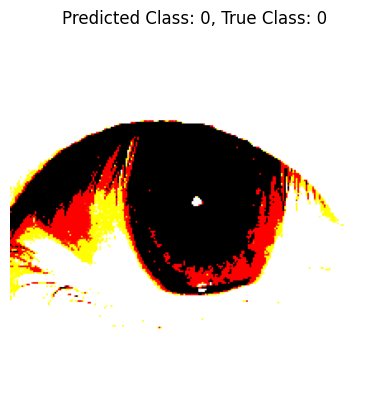

1/1 [==============================] - 0s 436ms/step


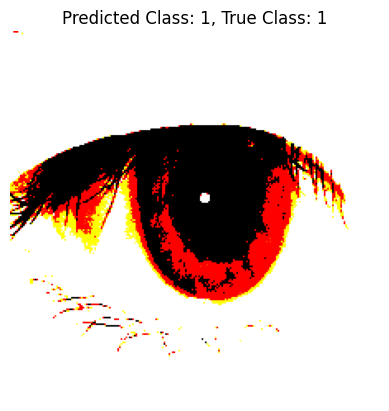

1/1 [==============================] - 0s 339ms/step


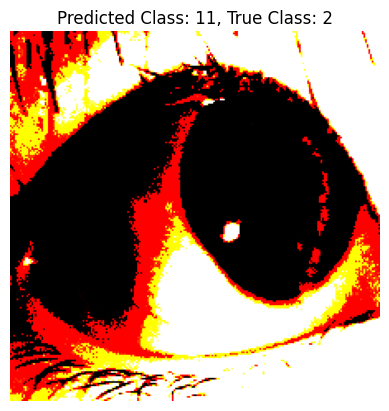

1/1 [==============================] - 0s 195ms/step


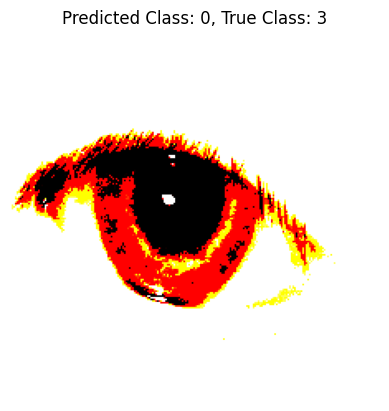

1/1 [==============================] - 0s 171ms/step


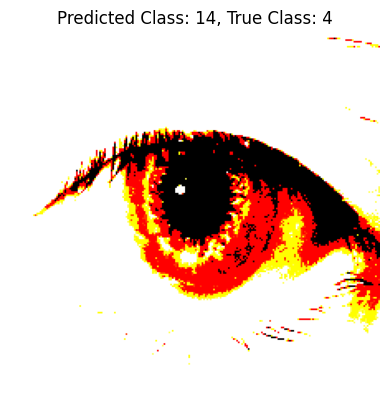

1/1 [==============================] - 0s 180ms/step


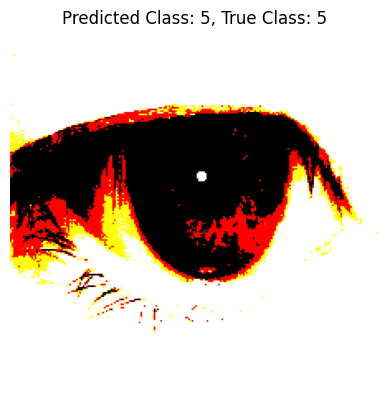

1/1 [==============================] - 0s 175ms/step


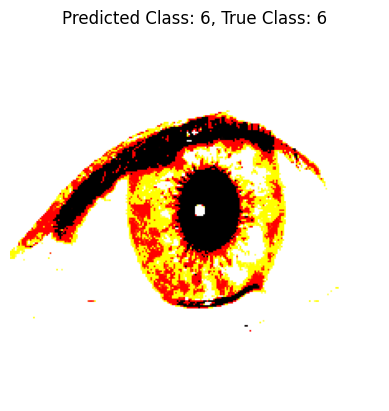

1/1 [==============================] - 0s 175ms/step


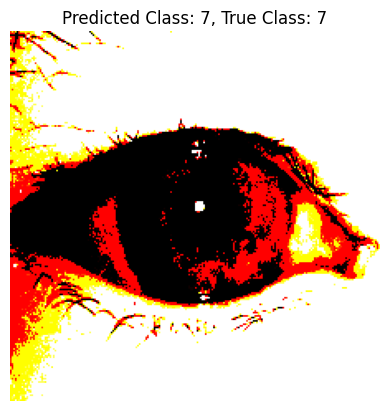

1/1 [==============================] - 0s 185ms/step


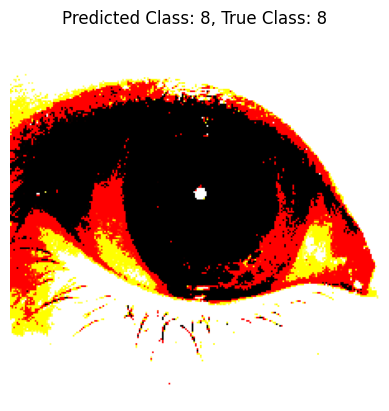

1/1 [==============================] - 0s 176ms/step


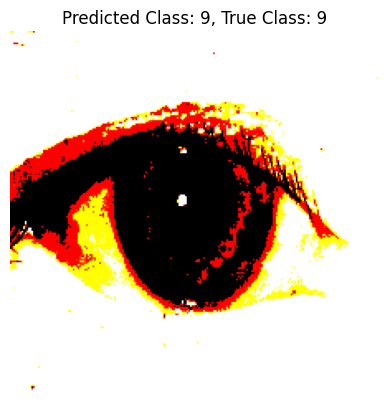

1/1 [==============================] - 0s 178ms/step


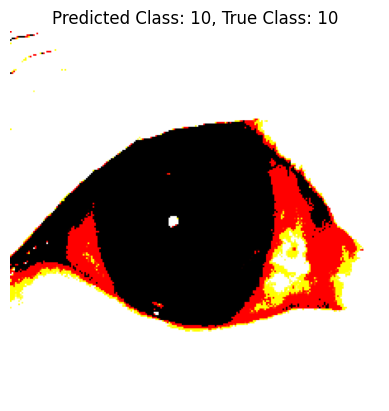

1/1 [==============================] - 0s 176ms/step


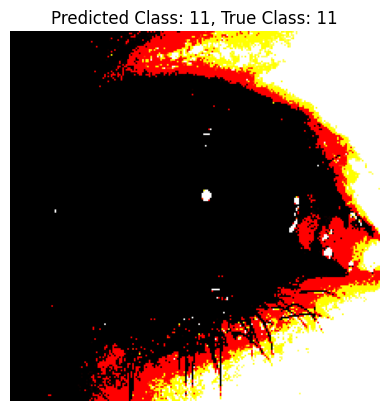

1/1 [==============================] - 0s 296ms/step


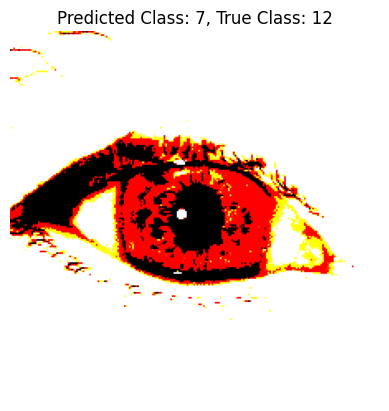

1/1 [==============================] - 0s 284ms/step


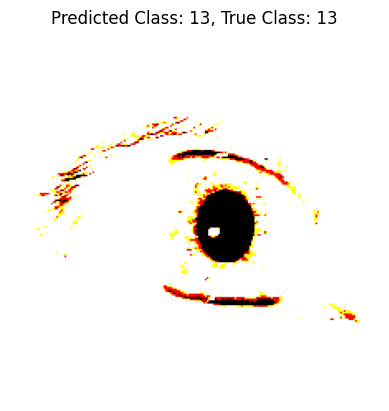

1/1 [==============================] - 0s 283ms/step


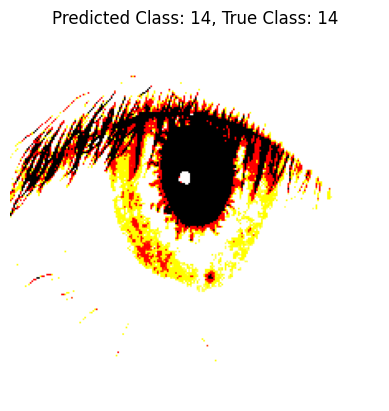

1/1 [==============================] - 0s 287ms/step


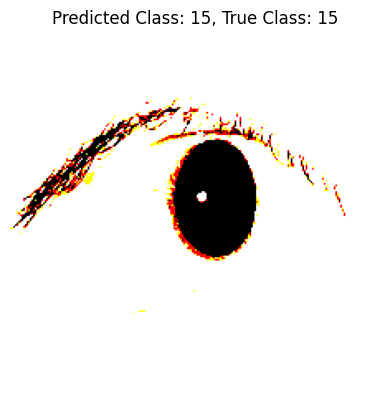

1/1 [==============================] - 0s 283ms/step


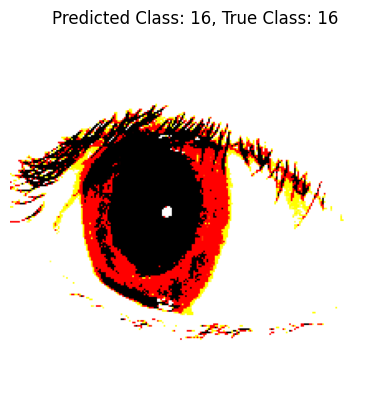

1/1 [==============================] - 0s 294ms/step


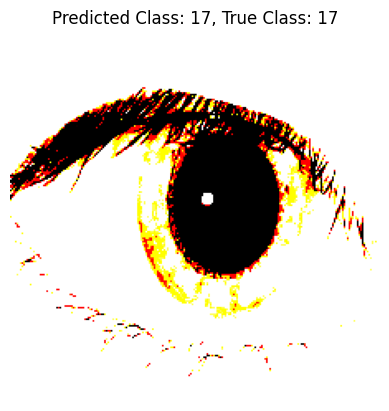

1/1 [==============================] - 0s 304ms/step


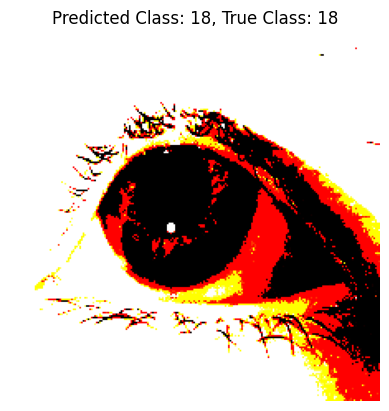

1/1 [==============================] - 0s 182ms/step


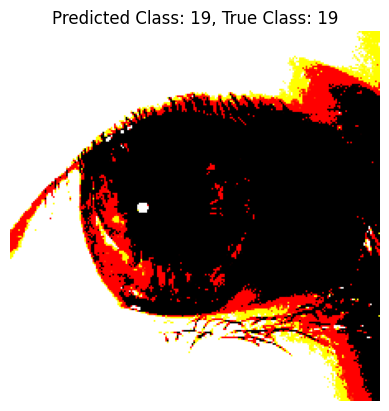

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = load_model('/content/drive/MyDrive/IrisRecognition/ResNet50_Iris.h5') # load model đã save

# Path to the test directory
test_dir = "/content/drive/MyDrive/IrisRecognition/Dataset4/Test" # Đường dẫn đến folder Train

# Create a test generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

# Predict and display images along with labels
for i in range(20):
    x, y_true = test_generator[i]
    y_pred = model.predict(x)

    predicted_class = np.argmax(y_pred)
    true_class = np.argmax(y_true[0])

    plt.imshow(np.squeeze(x))
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}, True Class: {true_class}")
    plt.show()
